In [3]:
from aniaft import coord
from aniaft import Segment, Line
from aniaft import Boundary, DirectedSeg as DS
from aniaft import Metric, UniformMetric
from aniaft import Triangulation

In [4]:
vpts = []
vpts.append(coord(0, 0)) # 0
vpts.append(coord(0, 2)) # 1
vpts.append(coord(5, 2)) # 2
vpts.append(coord(5, 0)) # 3
vpts.append(coord(0, 5)) # 4
vpts.append(coord(5, 5)) # 5

In [5]:
import numpy as np

class Wave(Segment):
    def __init__(self, v1, v2):
        super(Wave, self).__init__(v1, v2, 2, 0, 5);
    def __call__(self, t):
        return coord(t, 2 + np.sin(np.pi * t))

In [6]:
seg = []
seg.append(Line(0, 1, vpts))
seg.append(Wave(1, 2))
seg.append(Line(2, 3, vpts))
seg.append(Line(3, 0, vpts))
seg.append(Line(1, 4, vpts))
seg.append(Line(4, 5, vpts))
seg.append(Line(5, 2, vpts))

In [7]:
reg = [ \
    [DS(0, False), DS(1, False), DS(2, False), DS(3, False)], \
    [DS(4, False), DS(5, False), DS(6, False), DS(1, True)] \
]

In [8]:
bnd = Boundary(vpts, seg, reg)

In [17]:
class WeirdMetric(Metric):
    def size(self, p):
        return 0.07 * (2 + np.sin(np.pi * p.x))
    
metric = WeirdMetric()
tr = Triangulation(bnd, metric)
tr.generate()

0

In [19]:
p = tr.points()
t = tr.triangles()
e = tr.edges()

x = np.array([v.x for v in p])
y = np.array([v.y for v in p])
l = np.array([v.label for v in t])
t = np.array([[v.v1, v.v2, v.v3] for v in t])
e = np.array([(v.v1, v.v2) for v in e])

[0, 5, 0, 5]

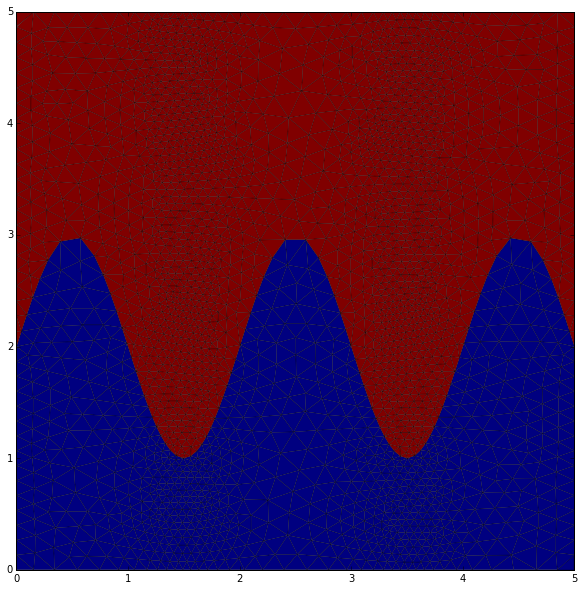

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))

plt.tripcolor(x, y, t, facecolors=l, edgecolors='k')
plt.axis([0, 5, 0, 5])